In [1]:
using Revise
using NonEqDigits

In [2]:
using LaTeXStrings
using GLMakie
using CairoMakie
using JLD2
using Geppetto

In [14]:
using MetaGraphsNext
using MetaGraphsNext: labels

In [5]:
# for the splitprob coloring code
includet("../scripts/ma_comp_v3.jl")

In [7]:
includet("../scripts/ma_colors.jl")

In [9]:
includet("../scripts/ma_graphviz.jl")

# SM Figure 2

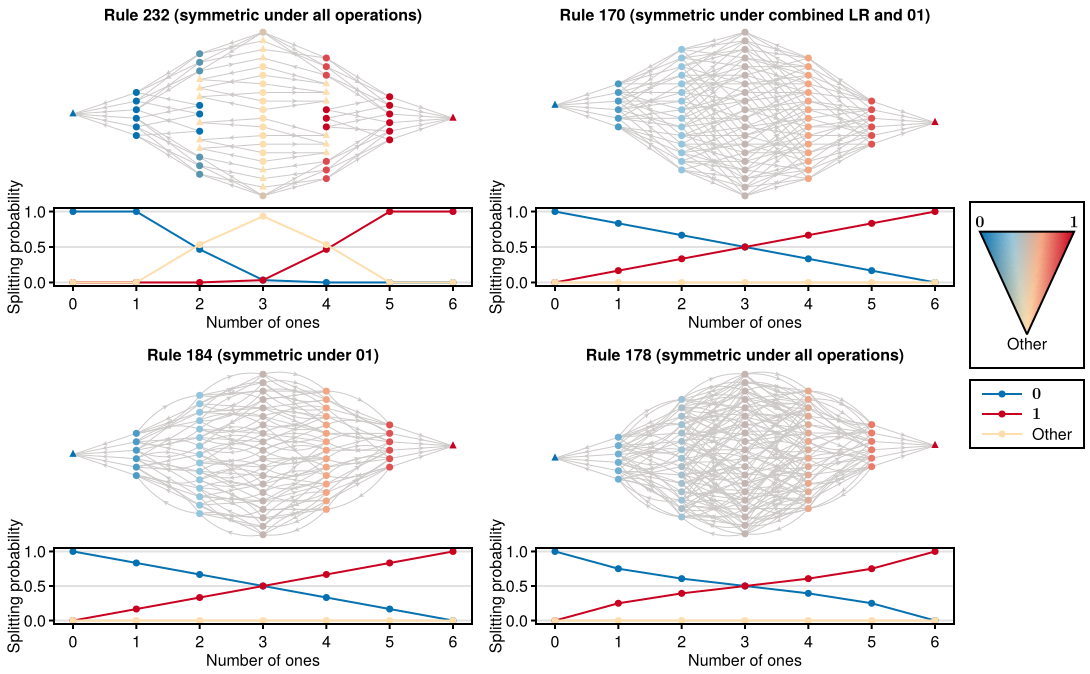

In [18]:
L = 6
rules = [232, 170, 184, 178]
titles = [
    "Rule 232 (symmetric under all operations)",
    "Rule 170 (symmetric under combined LR and 01)",
    "Rule 184 (symmetric under 01)",
    "Rule 178 (symmetric under all operations)",
]

fig = Figure(;
    size=(double_col_width * 0.8, (double_col_width / golden_ratio) * 0.8),
    fontsize=8,
    figure_padding=3.,
)

nrows, ncols = make_grid(length(rules))
paxs = []
for (r, title, ci) in zip(rules, titles, CartesianIndices((nrows, ncols)))
    # ax = Axis(fig[ci[2], ci[1]];
    #     title="Rule $r"
    # )
    gl = GridLayout(fig[ci[2], ci[1]])
    nax = Axis(gl[1,1];
        title,
        titlegap=0.,
    )
    pax = Axis(gl[2,1])
    push!(paxs, pax)

    ma = MolAut(L, r)

    pax.xticksize = 2.
    pax.xticklabelpad = 1.
    pax.yticksize = 2.
    pax.yticklabelpad = 1.
    
    pax.xlabelpadding = 0.
    pax.ylabelpadding = 0.5

    pax.yticks = range(0., 1., 3)
    pax.xgridvisible = false

    pax.xlabel = "Number of ones"
    pax.ylabel = "Splitting probability"

    hidedecorations!(nax)
    hidespines!(nax)

    linkxaxes!(nax, pax)
    
    # plot the avg split prob lines
    num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(ma.mg)
    sckw = (;
        markersize=5,
        linewidth=1
    )
    scatterlines!(pax, num1s, p0s;
        sckw...,
        label=L"\mathbf{0}",
        color=MAColors.bs_0s()
    )
    scatterlines!(pax, num1s, p1s;
        sckw...,
        label=L"\mathbf{1}",
        color=MAColors.bs_1s()
    )
    scatterlines!(pax, num1s, pxs;
        sckw...,
        label="Other",
        color=MAColors.bs_else()
    )

    layout = get_gv_layout_positions(ma;
        cluster=true,
        ranksep="2",
        normalize_x=true,
        normalize_y=(1.1, 3.)
    )

    coldict = get_all0sv1s_colors_v2(ma.mg;
        cmap0sv1s=MAColors.bs_cmap(),
        nondetcolor=MAColors.bs_else()
    )
    collist = []
    for v in 1:nv(ma.mg)
        l = label_for(ma.mg, v)
        push!(collist, coldict[l])
    end

    vs_in_acs = reduce(vcat, attracting_components(ma.mg))
    isac = [i in vs_in_acs for i in 1:nv(ma.mg)]
    
    node_marker=[:circle for _ in 1:nv(ma.mg)]
    for v in vs_in_acs
        node_marker[v] = :utriangle
    end

    # edge_color = [isac[e.src] ? :black : :gray for e in edges(ma.mg)]
    edge_color = [MAColors.gray1() for e in edges(ma.mg)]

    p = plotgm!(nax, ma;
        layout,
        flabels=false,
        e_color=false,
        node_color=collist,
        node_marker,
        edge_color,
        node_size=5.0,
        edge_width=0.5,
        arrow_size=4.0,
    ) 
    
    rowgap!(gl, 2.)
    rowsize!(gl, 2, Relative(0.3))
end

legend_gl = GridLayout(fig[:,ncols+1], 4, 1)

tetax = Axis(legend_gl[2,1];
    yreversed=true,
    # aspect=1
    # aspect=DataAspect()
)

leg = Legend(legend_gl[3,1], paxs[1];
    rowgap=-10.,
    padding=(6., 6., -3., -3.),
    # fontsize=6
)
leg.tellheight = true
# tetax.tellheight = true
# legend_gl.tellheight = true

all0sv1s_colors_v2_colorbar_v5!(tetax, 20;
    cmap0sv1s=MAColors.bs_cmap(),
    nondetcolor=MAColors.bs_else()
)
# ylims!(tetax, (-0.25, 1.1))
ylims!(tetax, (1.15, -0.25))
# xlims!(tetax, (-0., 1.))

rowgap!(legend_gl, 0.)
rowgap!(legend_gl, 2, 6.)
rowsize!(legend_gl, 1, Relative(0.3))
rowsize!(legend_gl, 4, Relative(0.3))

colgap!(fig.layout, 8.)
rowgap!(fig.layout, 8.)

save("../data/figures/sm2/draft1.pdf", fig)

fig

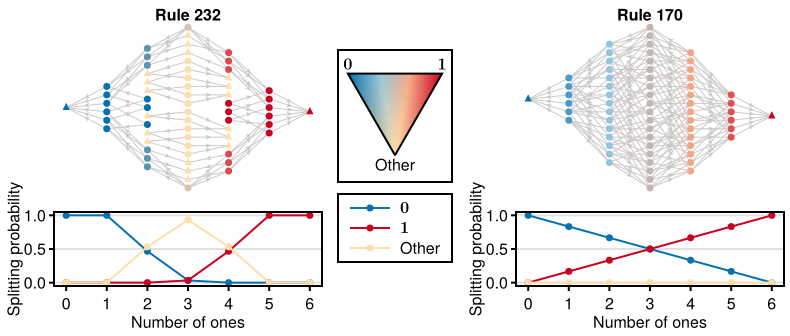

In [14]:
ma1 = MolAut(6, 232)
ma2 = MolAut(6, 170)

fig = Figure(;
    # size=(double_col_width / 3, double_col_width / golden_ratio),
    size=(double_col_width * 0.58, (double_col_width / golden_ratio) * 0.4),
    fontsize=8,
    figure_padding=3.,
)
ax11 = Axis(fig[1,1])
ax12 = Axis(fig[2,1])
ax21 = Axis(fig[1,3])
ax22 = Axis(fig[2,3])

legend_gl = GridLayout(fig[:,2], 4, 1)

for (nax, pax, ma) in zip([ax11, ax21], [ax12, ax22], [ma1, ma2])
    pax.xticksize = 2.
    pax.xticklabelpad = 1.
    pax.yticksize = 2.
    pax.yticklabelpad = 1.
    
    pax.xlabelpadding = 0.
    pax.ylabelpadding = 0.5

    pax.yticks = range(0., 1., 3)
    pax.xgridvisible = false

    pax.xlabel = "Number of ones"
    pax.ylabel = "Splitting probability"

    hidedecorations!(nax)
    hidespines!(nax)

    linkxaxes!(nax, pax)
    
    # plot the avg split prob lines
    num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(ma.mg)
    sckw = (;
        markersize=5,
        linewidth=1
    )
    scatterlines!(pax, num1s, p0s;
        sckw...,
        label=L"\mathbf{0}",
        color=MAColors.bs_0s()
    )
    scatterlines!(pax, num1s, p1s;
        sckw...,
        label=L"\mathbf{1}",
        color=MAColors.bs_1s()
    )
    scatterlines!(pax, num1s, pxs;
        sckw...,
        label="Other",
        color=MAColors.bs_else()
    )

    layout = get_gv_layout_positions(ma;
        cluster=true,
        ranksep="2",
        normalize_x=true,
        normalize_y=(1.1, 3.)
    )

    coldict = get_all0sv1s_colors_v2(ma.mg;
        cmap0sv1s=MAColors.bs_cmap(),
        nondetcolor=MAColors.bs_else()
    )
    collist = []
    for v in 1:nv(ma.mg)
        l = label_for(ma.mg, v)
        push!(collist, coldict[l])
    end

    vs_in_acs = reduce(vcat, attracting_components(ma.mg))
    isac = [i in vs_in_acs for i in 1:nv(ma.mg)]
    
    node_marker=[:circle for _ in 1:nv(ma.mg)]
    for v in vs_in_acs
        node_marker[v] = :utriangle
    end

    # edge_color = [isac[e.src] ? :black : :gray for e in edges(ma.mg)]
    edge_color = [MAColors.gray1() for e in edges(ma.mg)]

    p = plotgm!(nax, ma;
        layout,
        flabels=false,
        e_color=false,
        node_color=collist,
        node_marker,
        edge_color,
        node_size=5.0,
        edge_width=0.5,
        arrow_size=4.0,
    )
end

tetax = Axis(legend_gl[2,1];
    yreversed=true,
    # aspect=1
    # aspect=DataAspect()
)

leg = Legend(legend_gl[3,1], ax12;
    rowgap=-10.,
    padding=(6., 6., -3., -3.),
    # fontsize=6
)
leg.tellheight = true
# tetax.tellheight = true
# legend_gl.tellheight = true

rowgap!(legend_gl, 0.)
rowgap!(legend_gl, 2, 6.)
rowsize!(legend_gl, 1, Relative(0.1))
rowsize!(legend_gl, 4, Relative(0.1))

all0sv1s_colors_v2_colorbar_v5!(tetax, 20;
    cmap0sv1s=MAColors.bs_cmap(),
    nondetcolor=MAColors.bs_else()
)
# ylims!(tetax, (-0.25, 1.1))
ylims!(tetax, (1.15, -0.25))
# xlims!(tetax, (-0., 1.))

ax11.title = "Rule 232"
ax11.titlegap = 0.
ax11.yautolimitmargin = (0.05, 0.02)
ax21.title = "Rule 170"
ax21.titlegap = 0.
ax21.yautolimitmargin = (0.05, 0.02)

colgap!(fig.layout, 8.)
rowgap!(fig.layout, 8.)

rowsize!(fig.layout, 2, Relative(0.3))

# rowsize!(fig.layout, 1, Relative(0.3))
# rowsize!(fig.layout, 4, Relative(0.3))
# rowgap!(fig.layout, 1, 0.)
# rowgap!(fig.layout, 4, 0.)

# rowsize!(fig.layout, 3, Relative(0.15))
# colsize!(fig.layout, 1, Relative(1))

# save("../data/figures/0sv1s/fig4a_draft3.pdf", fig)
# save("../data/figures/fig5/base.pdf", fig)

fig

# Fig 5a - rules 232 and 170

## Making the figure

### Version 3 (horizontal)

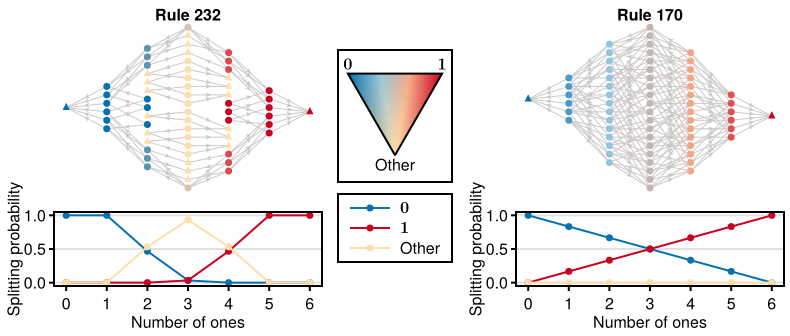

In [12]:
ma1 = MolAut(6, 232)
ma2 = MolAut(6, 170)

fig = Figure(;
    # size=(double_col_width / 3, double_col_width / golden_ratio),
    size=(double_col_width * 0.58, (double_col_width / golden_ratio) * 0.4),
    fontsize=8,
    figure_padding=3.,
)
ax11 = Axis(fig[1,1])
ax12 = Axis(fig[2,1])
ax21 = Axis(fig[1,3])
ax22 = Axis(fig[2,3])

legend_gl = GridLayout(fig[:,2], 4, 1)

for (nax, pax, ma) in zip([ax11, ax21], [ax12, ax22], [ma1, ma2])
    pax.xticksize = 2.
    pax.xticklabelpad = 1.
    pax.yticksize = 2.
    pax.yticklabelpad = 1.
    
    pax.xlabelpadding = 0.
    pax.ylabelpadding = 0.5

    pax.yticks = range(0., 1., 3)
    pax.xgridvisible = false

    pax.xlabel = "Number of ones"
    pax.ylabel = "Splitting probability"

    hidedecorations!(nax)
    hidespines!(nax)

    linkxaxes!(nax, pax)
    
    # plot the avg split prob lines
    num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(ma.mg)
    sckw = (;
        markersize=5,
        linewidth=1
    )
    scatterlines!(pax, num1s, p0s;
        sckw...,
        label=L"\mathbf{0}",
        color=MAColors.bs_0s()
    )
    scatterlines!(pax, num1s, p1s;
        sckw...,
        label=L"\mathbf{1}",
        color=MAColors.bs_1s()
    )
    scatterlines!(pax, num1s, pxs;
        sckw...,
        label="Other",
        color=MAColors.bs_else()
    )

    layout = get_gv_layout_positions(ma;
        cluster=true,
        ranksep="2",
        normalize_x=true,
        normalize_y=(1.1, 3.)
    )

    coldict = get_all0sv1s_colors_v2(ma.mg;
        cmap0sv1s=MAColors.bs_cmap(),
        nondetcolor=MAColors.bs_else()
    )
    collist = []
    for v in 1:nv(ma.mg)
        l = label_for(ma.mg, v)
        push!(collist, coldict[l])
    end

    vs_in_acs = reduce(vcat, attracting_components(ma.mg))
    isac = [i in vs_in_acs for i in 1:nv(ma.mg)]
    
    node_marker=[:circle for _ in 1:nv(ma.mg)]
    for v in vs_in_acs
        node_marker[v] = :utriangle
    end

    # edge_color = [isac[e.src] ? :black : :gray for e in edges(ma.mg)]
    edge_color = [MAColors.gray1() for e in edges(ma.mg)]

    p = plotgm!(nax, ma;
        layout,
        flabels=false,
        e_color=false,
        node_color=collist,
        node_marker,
        edge_color,
        node_size=5.0,
        edge_width=0.5,
        arrow_size=4.0,
    )
end

tetax = Axis(legend_gl[2,1];
    yreversed=true,
    # aspect=1
    # aspect=DataAspect()
)

leg = Legend(legend_gl[3,1], ax12;
    rowgap=-10.,
    padding=(6., 6., -3., -3.),
    # fontsize=6
)
leg.tellheight = true
# tetax.tellheight = true
# legend_gl.tellheight = true

rowgap!(legend_gl, 0.)
rowgap!(legend_gl, 2, 6.)
rowsize!(legend_gl, 1, Relative(0.1))
rowsize!(legend_gl, 4, Relative(0.1))

all0sv1s_colors_v2_colorbar_v5!(tetax, 20;
    cmap0sv1s=MAColors.bs_cmap(),
    nondetcolor=MAColors.bs_else()
)
# ylims!(tetax, (-0.25, 1.1))
ylims!(tetax, (1.15, -0.25))
# xlims!(tetax, (-0., 1.))

ax11.title = "Rule 232"
ax11.titlegap = 0.
ax11.yautolimitmargin = (0.05, 0.02)
ax21.title = "Rule 170"
ax21.titlegap = 0.
ax21.yautolimitmargin = (0.05, 0.02)

colgap!(fig.layout, 8.)
rowgap!(fig.layout, 8.)

rowsize!(fig.layout, 2, Relative(0.3))

# rowsize!(fig.layout, 1, Relative(0.3))
# rowsize!(fig.layout, 4, Relative(0.3))
# rowgap!(fig.layout, 1, 0.)
# rowgap!(fig.layout, 4, 0.)

# rowsize!(fig.layout, 3, Relative(0.15))
# colsize!(fig.layout, 1, Relative(1))

save("../data/figures/0sv1s/fig4a_draft3.pdf", fig)
save("../data/figures/fig5/base.pdf", fig)

fig

### Version 2 (graphmakie)

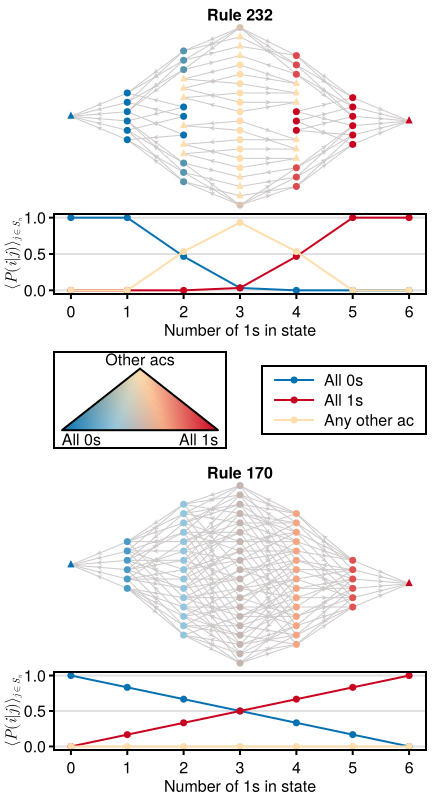

In [7]:
ma1 = MolAut(6, 232)
ma2 = MolAut(6, 170)

f = Figure(;
    size=(double_col_width / 3, double_col_width / golden_ratio),
    fontsize=8,
    figure_padding=3.,
)
ax11 = Axis(f[1,1])
ax12 = Axis(f[2,1])
ax21 = Axis(f[4,1])
ax22 = Axis(f[5,1])

legend_gl = GridLayout(f[3,1])

for (nax, pax, ma) in zip([ax11, ax21], [ax12, ax22], [ma1, ma2])
    pax.xticksize = 2.
    pax.xticklabelpad = 1.
    pax.yticksize = 2.
    pax.yticklabelpad = 1.
    
    pax.xlabelpadding = 0.
    pax.ylabelpadding = 0.5

    pax.yticks = range(0., 1., 3)
    pax.xgridvisible = false

    pax.xlabel = "Number of 1s in state"
    pax.ylabel = L"\langle P(i|j) \rangle_{j \in S_n}"

    hidedecorations!(nax)
    hidespines!(nax)

    linkxaxes!(nax, pax)
    
    # plot the avg split prob lines
    num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(ma.mg)
    sckw = (;
        markersize=5,
        linewidth=1
    )
    scatterlines!(pax, num1s, p0s;
        sckw...,
        label="All 0s",
        color=MAColors.bs_0s()
    )
    scatterlines!(pax, num1s, p1s;
        sckw...,
        label="All 1s",
        color=MAColors.bs_1s()
    )
    scatterlines!(pax, num1s, pxs;
        sckw...,
        label="Any other ac",
        color=MAColors.bs_else()
    )

    layout = get_gv_layout_positions(ma;
        cluster=true,
        ranksep="2",
        normalize_x=true,
        normalize_y=(1.1, 3.)
    )

    coldict = get_all0sv1s_colors_v2(ma.mg;
        cmap0sv1s=MAColors.bs_cmap(),
        nondetcolor=MAColors.bs_else()
    )
    collist = []
    for v in 1:nv(ma.mg)
        l = label_for(ma.mg, v)
        push!(collist, coldict[l])
    end

    vs_in_acs = reduce(vcat, attracting_components(ma.mg))
    isac = [i in vs_in_acs for i in 1:nv(ma.mg)]
    
    node_marker=[:circle for _ in 1:nv(ma.mg)]
    for v in vs_in_acs
        node_marker[v] = :utriangle
    end

    # edge_color = [isac[e.src] ? :black : :gray for e in edges(ma.mg)]
    edge_color = [MAColors.gray1() for e in edges(ma.mg)]

    p = plotgm!(nax, ma;
        layout,
        flabels=false,
        e_color=false,
        node_color=collist,
        node_marker,
        edge_color,
        node_size=5.0,
        edge_width=0.5,
        arrow_size=4.0,
    )
end

Legend(legend_gl[1,2], ax12;
    rowgap=-10.,
    padding=(6., 6., -3., -3.),
    # fontsize=6
)

tetax = Axis(legend_gl[1,1];
    # aspect=1
    # aspect=DataAspect()
)
all0sv1s_colors_v2_colorbar_v5!(tetax, 20;
    cmap0sv1s=MAColors.bs_cmap(),
    nondetcolor=MAColors.bs_else()
)
ylims!(tetax, (-0.25, 1.1))
# xlims!(tetax, (-0., 1.))

ax11.title = "Rule 232"
ax11.titlegap = 0.
ax11.yautolimitmargin = (0.05, 0.02)
ax21.title = "Rule 170"
ax21.titlegap = 0.
ax21.yautolimitmargin = (0.05, 0.02)

rowgap!(f.layout, 8.)

rowsize!(f.layout, 1, Relative(0.3))
rowsize!(f.layout, 4, Relative(0.3))
rowgap!(f.layout, 1, 0.)
rowgap!(f.layout, 4, 0.)

rowsize!(f.layout, 3, Relative(0.15))
colsize!(f.layout, 1, Relative(1))

save("../data/figures/0sv1s/fig4a_draft3.pdf", f)

f

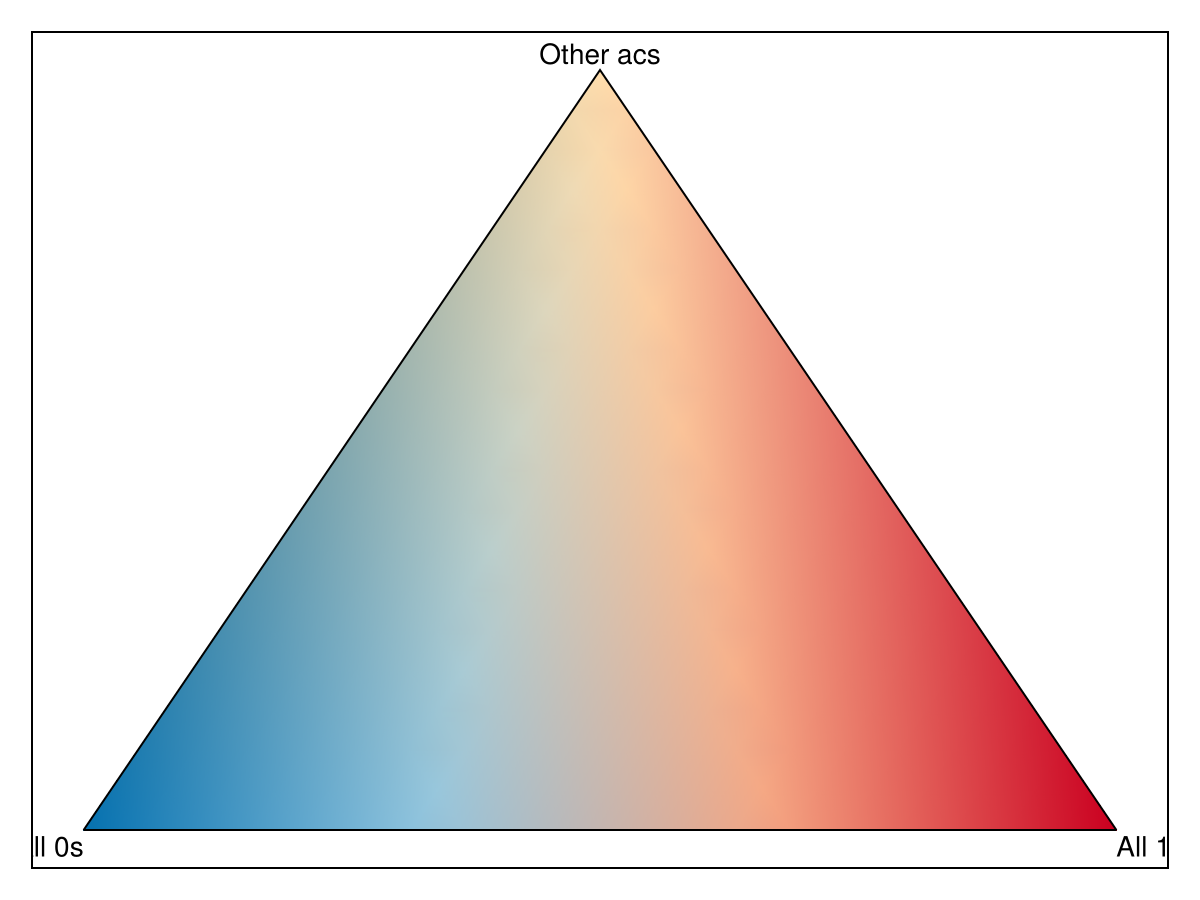

In [394]:
f = Figure()
ax = Axis(f[1,1])
all0sv1s_colors_v2_colorbar_v5!(ax, 20;
    cmap0sv1s=MAColors.bs_cmap(),
    nondetcolor=MAColors.bs_else()
)
# display(GLMakie.Screen(), f)
save("./kaka.pdf", f)
f

### Version 1

In [23]:
function make_0sv1s_p3(ma)
    g = molaut_gv(ma;
        # simple_nodes=true,
        cluster=true,
    
        highlight_acs="magenta",
        node_colors=get_all0sv1s_colors_v2(ma.mg;
            cmap0sv1s=MAColors.bs_cmap(),
            nondetcolor=MAColors.bs_else()
        ),
        
        ranksep="2.",
        rankdir="LR",
        nodesep="0.1",
        size="3,3",
        dpi="300",
    )

    fname = tempname()
    GraphvizDotLang.save(g, fname; format="png")

    g, fname
end
make_0sv1s_p3(L, r; reduced=false) = make_0sv1s_p3(MolAut(L, r; reduced))

make_0sv1s_p3 (generic function with 2 methods)

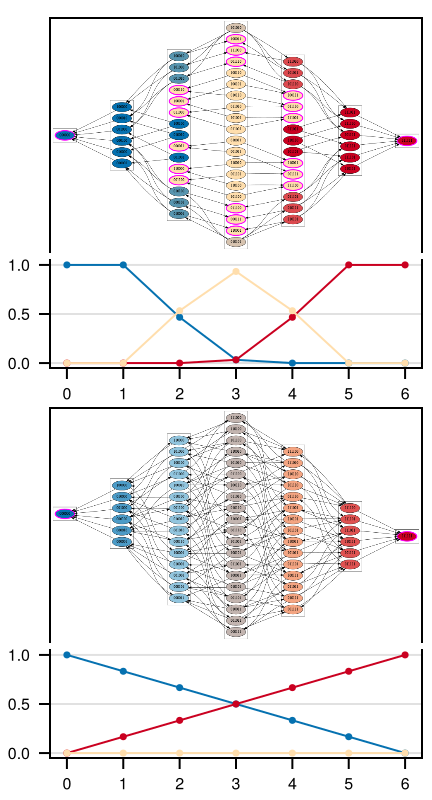

In [28]:
f = Figure(;
    size=(double_col_width / 3, double_col_width / golden_ratio),
    fontsize=8,
    figure_padding=5.,
)
ax1 = Axis(f[1,1];
    aspect=DataAspect()
)
ax2 = Axis(f[2,1])
ax3 = Axis(f[3,1];
    aspect=DataAspect()
)
ax4 = Axis(f[4,1])

_, fn = make_0sv1s_p3(6, 232)
xx1 = load(fn)
image!(ax1, rotr90(xx1))

_, fn = make_0sv1s_p3(6, 170)
xx2 = load(fn)
image!(ax3, rotr90(xx2))

for ax in [ax1, ax3]
    hidedecorations!(ax)
    hidespines!(ax, :b)
end

# plot the avg splitprobs
sckw = (;
    markersize=5,
    linewidth=1
)

num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(MolAut(6, 232).mg)
scatterlines!(ax2, num1s, p0s; sckw..., color=MAColors.bs_0s())
scatterlines!(ax2, num1s, p1s; sckw..., color=MAColors.bs_1s())
scatterlines!(ax2, num1s, pxs; sckw..., color=MAColors.bs_else())
num1s, p0s, p1s, pxs = get_all0sv1s_avg_splitprobs(MolAut(6, 170).mg)
scatterlines!(ax4, num1s, p0s; sckw..., color=MAColors.bs_0s())
scatterlines!(ax4, num1s, p1s; sckw..., color=MAColors.bs_1s())
scatterlines!(ax4, num1s, pxs; sckw..., color=MAColors.bs_else())

for ax in [ax2, ax4]
    ax.xgridvisible = false
    # ax.ygridvisible = false
    ax.yticks = range(0., 1., 3)
    hidespines!(ax, :t)
end

# rowsize!(f.layout, 1, Auto(true, 1.5))
rowsize!(f.layout, 2, Relative(0.15))
rowsize!(f.layout, 4, Relative(0.15))

rowgap!(f.layout, 0.)

# display(GLMakie.Screen(), f)
save("../data/figures/0sv1s/draft1.pdf", f)
f

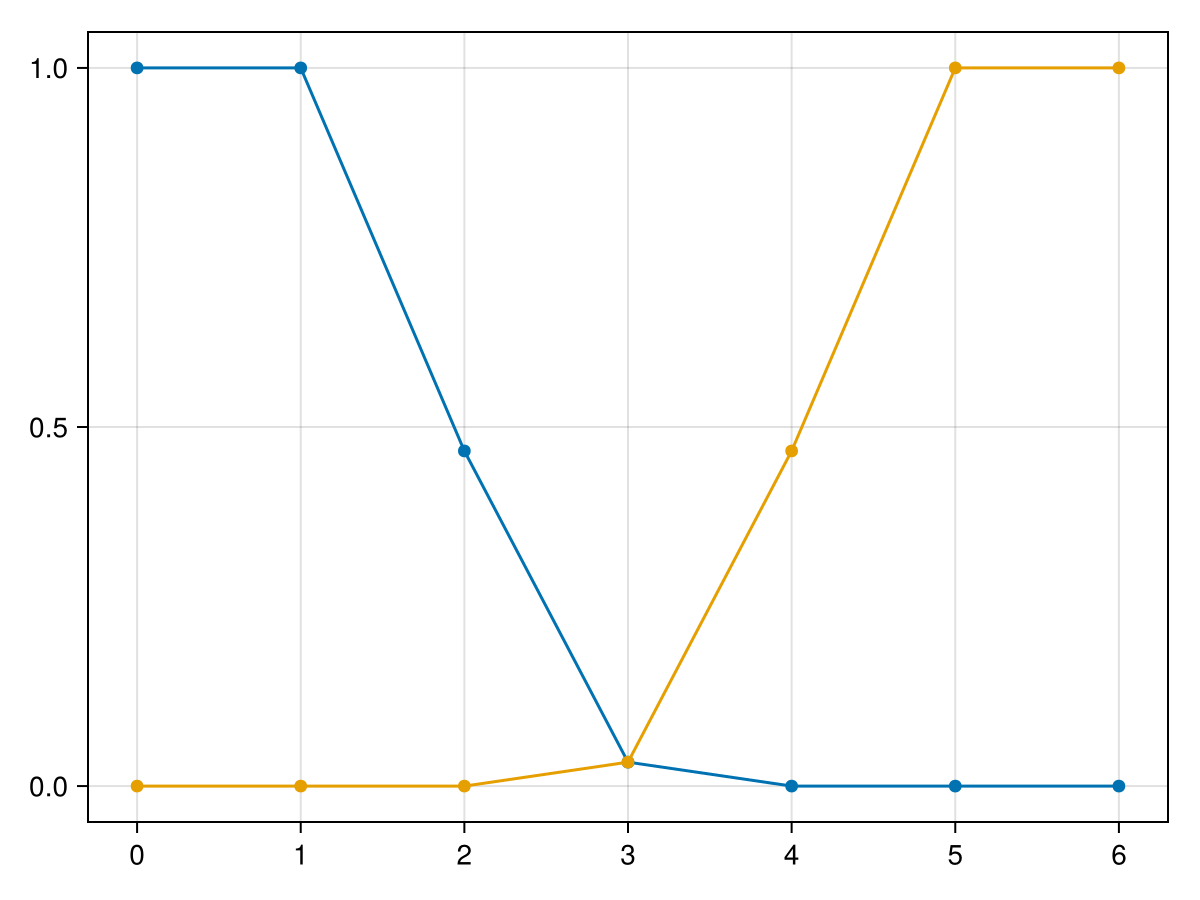

In [222]:
ma = MolAut(6, 232);
num1s, p0s, p1s = get_all0sv1s_avg_splitprobs(ma.mg)

fap = scatterlines(num1s, p0s)
scatterlines!(fap.axis, num1s, p1s)
fap

## General

In [6]:
function make_0sv1s_p4(ma)
    layout = get_gv_layout_positions(ma;
        cluster=true,
        ranksep="2",
        normalize_x=true,
        normalize_y=(10, 20)
    )

    coldict = get_all0sv1s_colors_v2(ma.mg)
    collist = []
    for v in 1:nv(ma.mg)
        l = label_for(ma.mg, v)
        push!(collist, coldict[l])
    end

    vs_in_acs = reduce(vcat, attracting_components(ma.mg))
    isac = [i in vs_in_acs for i in 1:nv(ma.mg)]
    
    node_marker=[:circle for _ in 1:nv(ma.mg)]
    for v in vs_in_acs
        node_marker[v] = :rect
    end

    # edge_color = [isac[e.src] ? :black : :gray for e in edges(ma.mg)]
    edge_color = [MAColors.gray1() for e in edges(ma.mg)]

    faa = plotgm(ma;
        layout,
        flabels=false,
        e_color=false,
        node_color=collist,
        node_marker,
        edge_color
    )
    faa
end

make_0sv1s_p4 (generic function with 1 method)

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweighteddigraph.jl:170


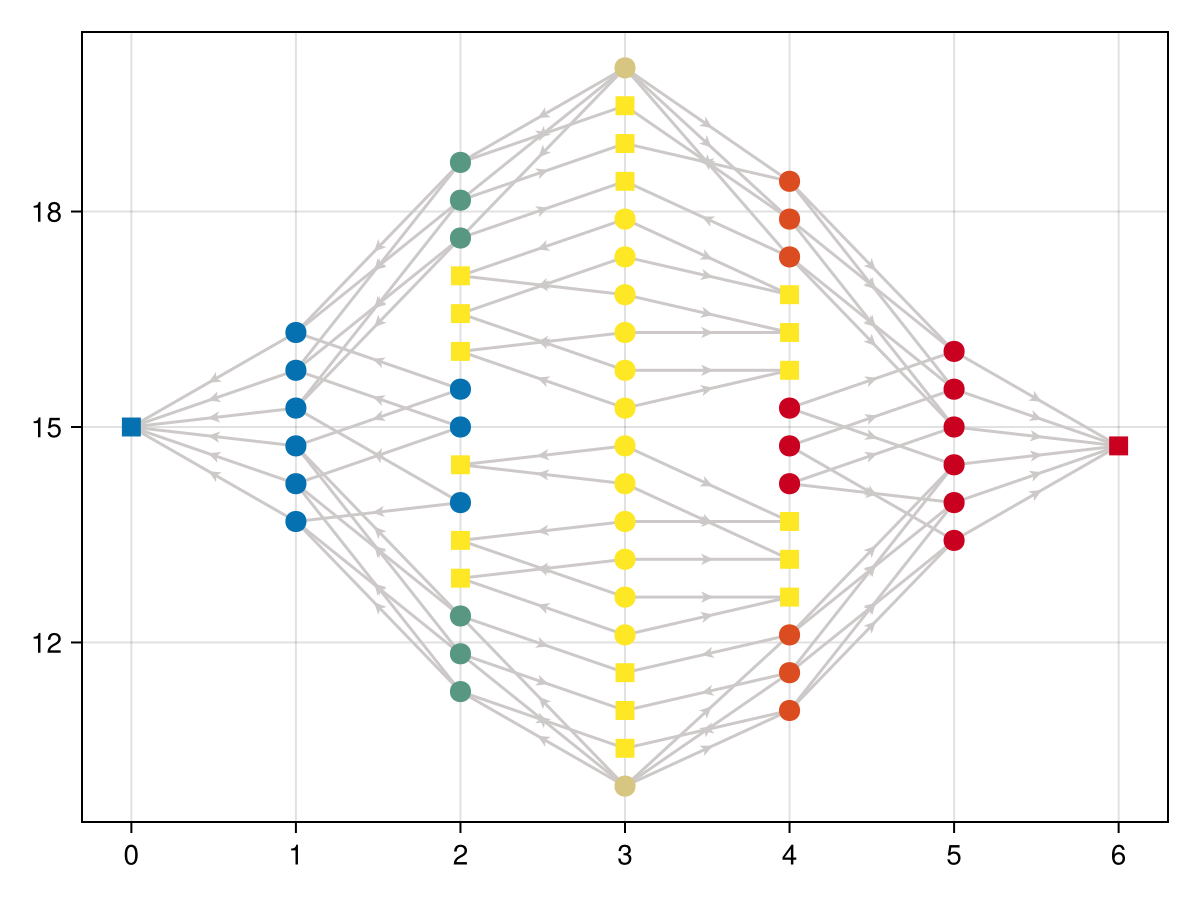

In [7]:
ma = MolAut(6, 232)
# g = molaut_gv(ma;
#     # simple_nodes=true,
#     cluster=true,
    
#     ranksep="2.",
#     rankdir="LR",
#     nodesep="0.1",
#     size="5",
# )
make_0sv1s_p4(ma)

### Old

In [8]:
function make_0sv1s_p1(ma)
    g = molaut_gv(ma;
        # simple_nodes=true,
        cluster=true,
    
        highlight_acs="magenta",
        node_colors=get_all0sv1s_colors_v2(ma.mg),
        
        ranksep="0.8",
        size="10",
        rankdir="TB",
    )
end
make_0sv1s_p1(L, r; reduced=false) = make_0sv1s_p1(MolAut(L, r; reduced))

function make_0sv1s_p2(ma)
    g = molaut_gv(ma;
        # simple_nodes=true,
        cluster=true,
    
        highlight_acs="magenta",
        node_colors=get_all0sv1s_colors_v2(ma.mg),
        
        ranksep="0.8",
        size="10",
        rankdir="LR",
        nodesep="0.1"
    )
end
make_0sv1s_p2(L, r; reduced=false) = make_0sv1s_p2(MolAut(L, r; reduced))

make_0sv1s_p2 (generic function with 2 methods)

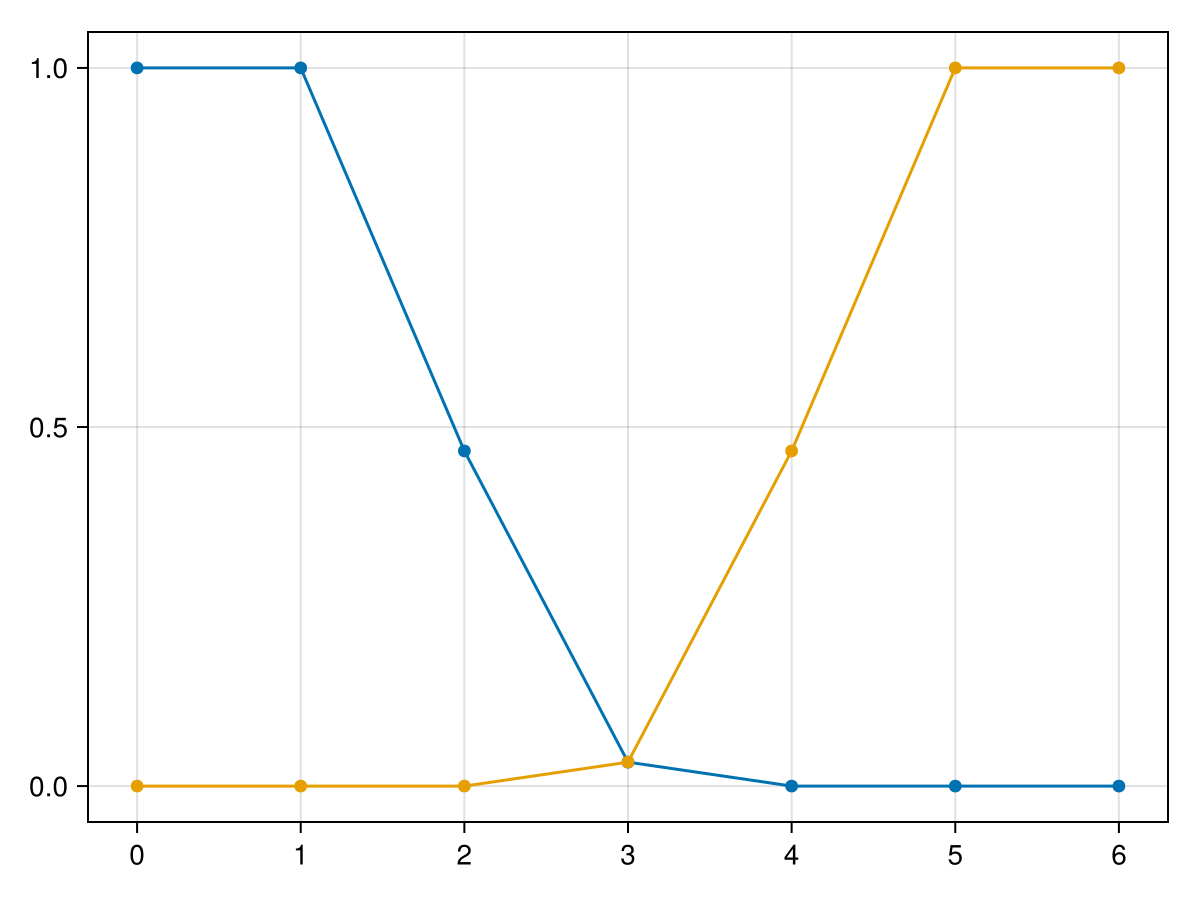

In [9]:
ma = MolAut(6, 232);
num1s, p0s, p1s = get_all0sv1s_avg_splitprobs(ma.mg)

fap = scatterlines(num1s, p0s)
scatterlines!(fap.axis, num1s, p1s)
fap

## Make many plots

In [91]:
L = 6
for r in ca_ucodes_f1()
    g = make_0sv1s_p1(L, r;
        reduced=false
    )
    GraphvizDotLang.save(g, "../data/figures/0sv1s/many_full/$r.pdf"; format="pdf")
end

In [92]:
L = 6
for r in ca_ucodes_f1()
    g = make_0sv1s_p1(L, r;
        reduced=true
    )
    GraphvizDotLang.save(g, "../data/figures/0sv1s/many_red/$r.pdf"; format="pdf")
end

# Fig 5b - "half" lives

In [76]:
using NonlinearSolve
function make_hl_tester(L, r, threshold=0.9, tmax=1e10)
    let L=L, r=r, th=threshold, tmax=tmax
        function(mu, epsilon)
            ma = MolAut(L, r; mu, epsilon)
    
            v0 = code_for(ma.mg, fill(0, ma.L))
            etm = etransmat(ma; mat=true)
        
            u0 = fill(0., numstates(ma))
            u0[v0] = 1.
        
            func(t) = (exp(etm * t) * u0)[v0]
        
            fmin = func(tmax)
            if fmin >= th
                tmax
            else
                ip = IntervalNonlinearProblem((t,_)->func(t) - th, (0., tmax))
                s = solve(ip)

                if  SciMLBase.successful_retcode(s.retcode)
                    s.u
                else
                    missing
                end
            end
        end
    end
end

make_hl_tester (generic function with 3 methods)

## V2

In [164]:
L = 6
th = 0.9
tmax = 1e10

mus = range(0., 10, 30)
epsilons = [0., 1e-2, 0.1, 0.5]
epsilon_colors = [colorant"#1b9e77", colorant"#d95f02", colorant"#7570b3", colorant"#e7298a"]

f = Figure(;
    size=(double_col_width * 0.4, (double_col_width / golden_ratio) * 0.4),
    fontsize=8,
    figure_padding=3.,
)
ax = Axis(f[1,1];
    xlabel=L"\beta\Delta\mu",
    ylabel=L"k_\text{cat}\tau_{10}",
    yscale=log10,
    xticksize=2.,
    xticklabelpad=1.,
    yticksize=2.,
    yticklabelpad=1.,
    
    xlabelpadding=0.,
    ylabelpadding=0.,

    xlabelsize=10,
    ylabelsize=10,

    xgridvisible=false,
)

for r in (232, 170)
    tester = make_hl_tester(L, r, th, tmax)
    for (epsilon, color) in zip(epsilons, epsilon_colors)
        ts = tester.(mus, epsilon)
        lines!(ax, mus, ts;
            linestyle=(r == 232) ? :solid : :dash,
            # label=(@sprintf "Rule %d, eps %.3g" r epsilon),
            color,
        )
    end
end

ylims!(ax, 1e-2, 1e3)

lspecs = Any[
    LineElement(linestyle=:solid),
    LineElement(linestyle=:dash),
]
llabels = Any[
    "Rule 232",
    "Rule 170",
]

for (e, c) in zip(epsilons, epsilon_colors)
    push!(lspecs, MarkerElement(marker=:circle, markersize=10, color=c))
    push!(llabels, latexstring(@sprintf "k_\\text{spo} = %.3g" e))
end

axislegend(ax, lspecs, llabels;
    # position=(0.55, 0.19),
    position=:lt,
    patchsize=(15., 15.),
    patchlabelgap=1,
    rowgap=0,
    padding=fill(1., 4)
)


save("../data/figures/fig5/tauplot.pdf", f)

f
nothing

In [130]:
latexstring(@sprintf "L=%d" 41)

L"$L=41$"

## V1

### Plotting 1/T vs mu

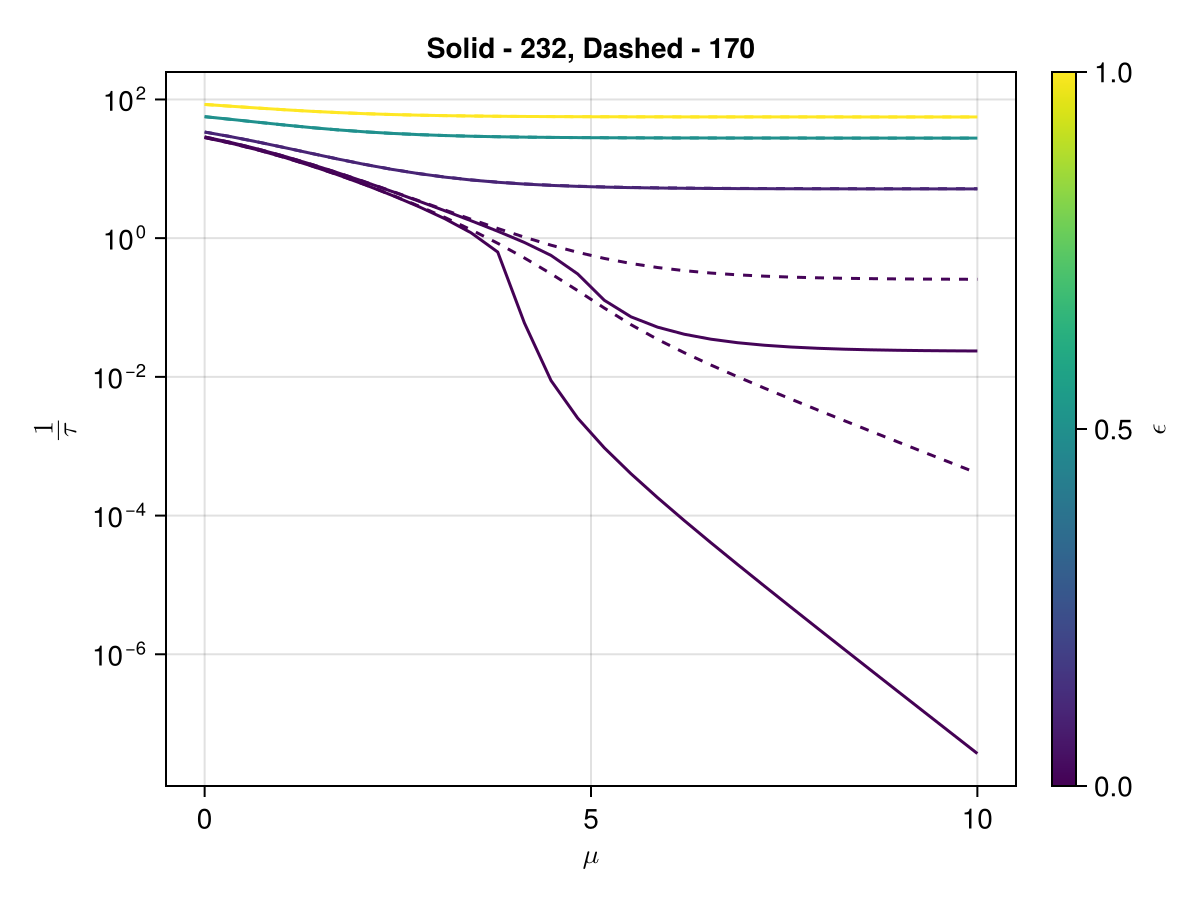

In [77]:
L = 6
th = 0.9
tmax = 1e10

f = Figure()
ax = Axis(f[1,1];
    xlabel=L"\mu",
    ylabel=L"\frac{1}{\tau}",
    yscale=log10,
)

mus = range(0., 10, 30)
epsilons = [0., 1e-2, 0.1, 0.5, 1.]

for r in (232, 170)
    tester = make_hl_tester(L, r, th, tmax)
    for epsilon in epsilons
        ts = tester.(mus, epsilon)
        lines!(ax, mus, 1.0 ./ ts;
            linestyle=(r == 232) ? :solid : :dash,
            # label=(@sprintf "Rule %d, eps %.3g" r epsilon),
            color=epsilon,
            colorrange=extrema(epsilons)
        )
    end
end
Colorbar(f[1,2]; colorrange=extrema(epsilons), label=L"\epsilon")

ax.title = "Solid - 232, Dashed - 170"

# axislegend(ax)

f

In [89]:
save("../data/figures/0sv1s/invtau_vs_mu.pdf", f)

CairoMakie.Screen{PDF}


### More pretty

In [21]:
L = 6
th = 0.9
tmax = 10

N = 10
mus = range(0., 5., N)
epsilons = range(0., 1.0, N)
# epsilons = 10 .^ range(-10, 0.0, N)

ts232 = make_hl_tester(L, 232, th, tmax).(mus, epsilons')
ts170 = make_hl_tester(L, 170, th, tmax).(mus, epsilons')

nothing

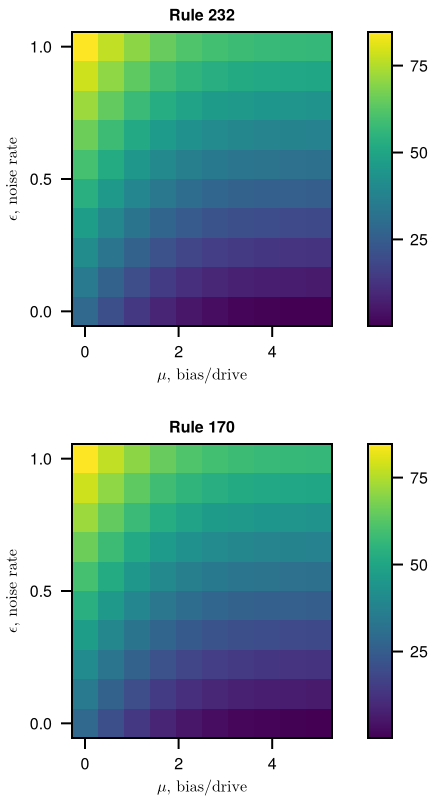

In [24]:
f = Figure(;
    size=(double_col_width / 3, double_col_width / golden_ratio),
    fontsize=8,
    figure_padding=3.,
)

i = 1
ps = []
for (r, ts) in zip([232, 170], [ts232, ts170])
    ax = Axis(f[i,1])

    p = heatmap!(ax, mus, epsilons, 1.0 ./ ts;
    # p = heatmap!(ax, mus, epsilons, ts;
        # colorrange=(1e-1, tmax),
        # colorscale=log10
    )
    push!(ps, p)
    
    ax.title = "Rule $r"
    ax.xlabel = L"\mu \text{, bias/drive}"
    ax.ylabel = L"\epsilon \text{, noise rate}"

    Colorbar(f[i,2], p)
    i += 1
end

save("../data/figures/0sv1s/hl_t2.pdf", f)
f

### Testing

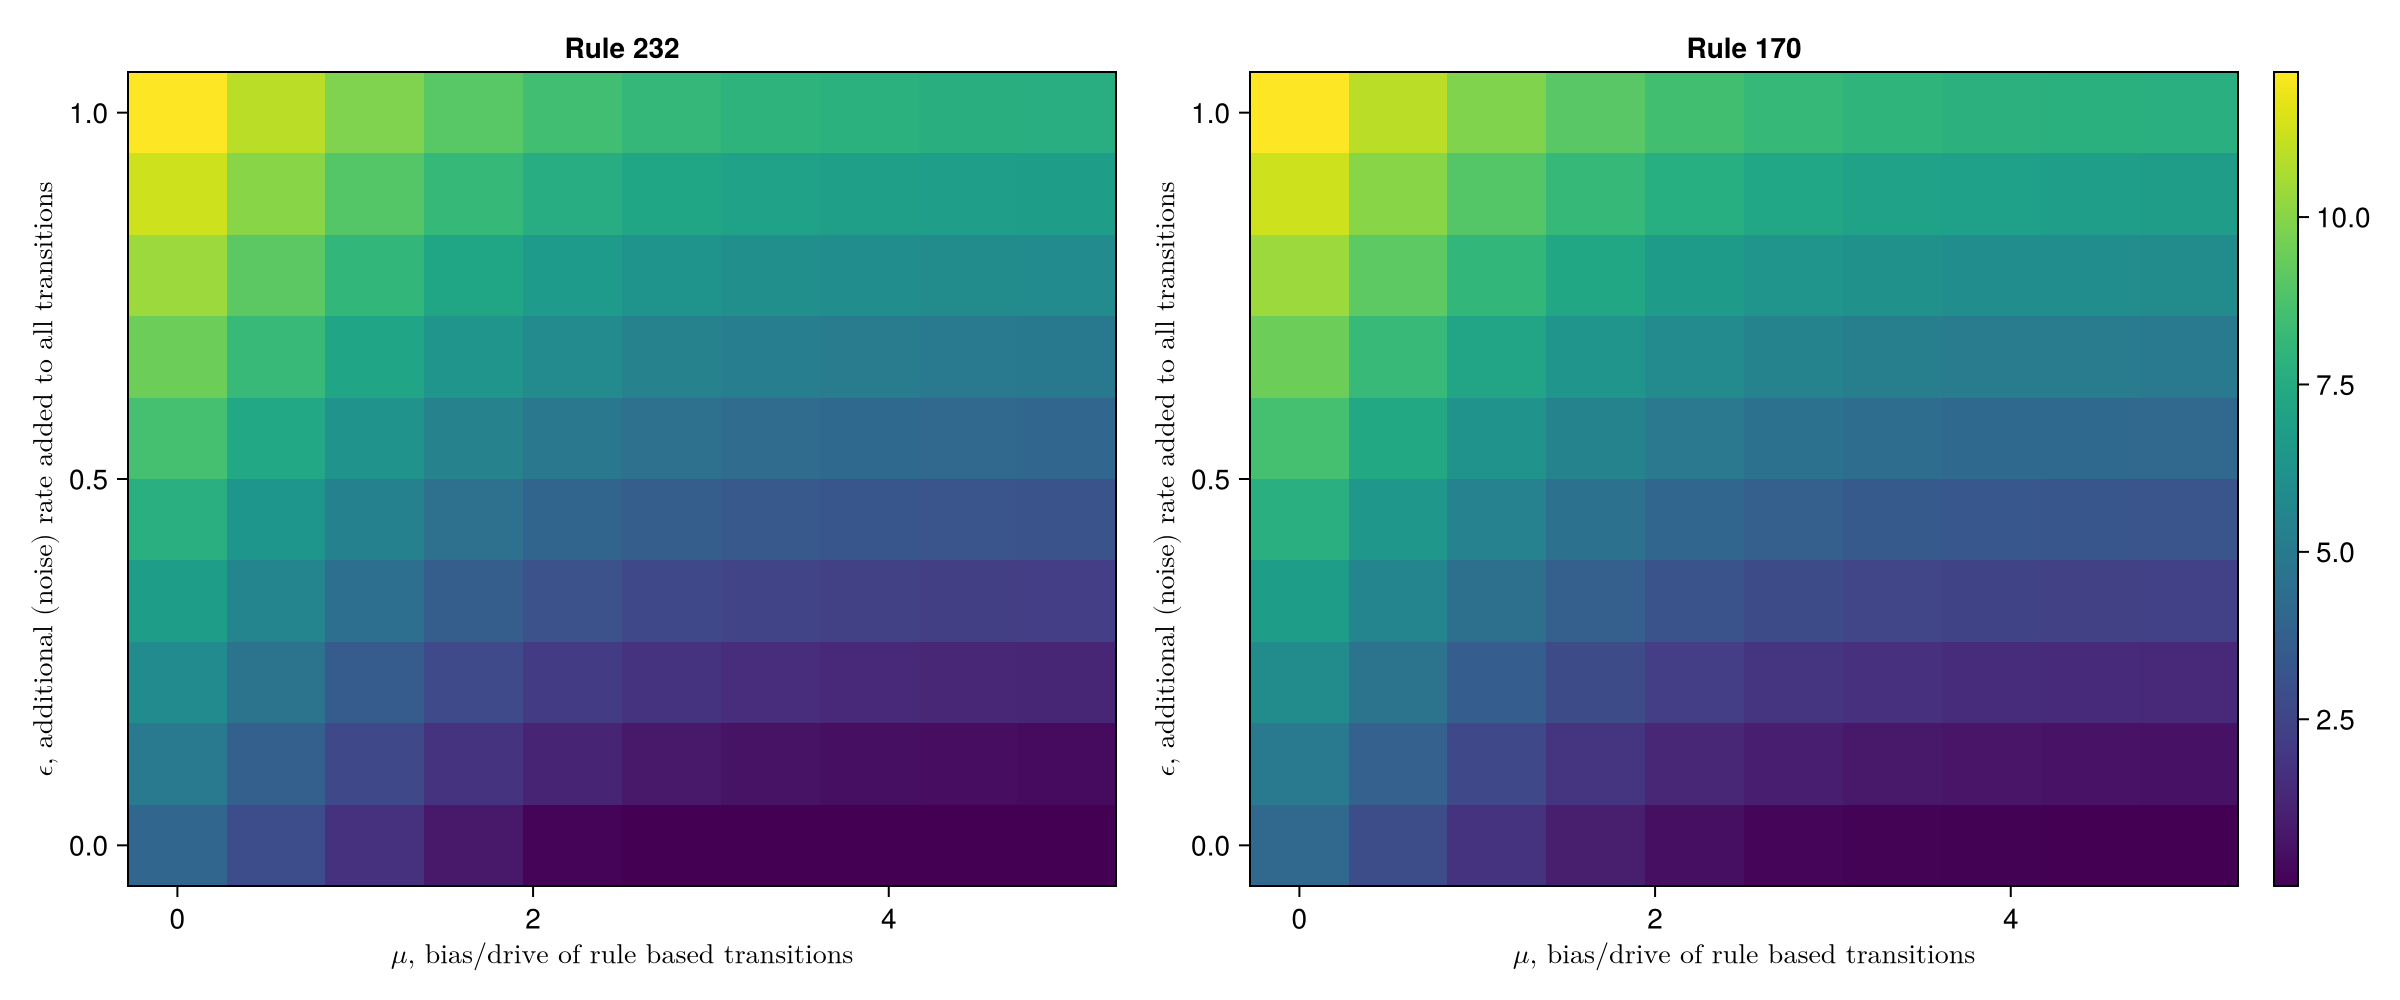

In [54]:
N = 10
mus = range(0., 5., N)
epsilons = range(0., 1.0, N)
# epsilons = range(0., 0.3, N)

L = 6
rs = [
    232, 170,
    # 204, 140,
    # 236, 200, 0, 51
]
numrs = length(rs)

tss = []
for r in rs
    push!(tss, make_hl_tester(L, r, 0.5, 1e2).(mus, epsilons'))
end

ckwargs = (;
    # colormap=:viridis,
    # colorrange=extrema(reduce(vcat, tss)),
    # colorscale=log10
)

f = Figure(; size=(1200, 500))
axs = []
ps = []
for i in 1:numrs
    r = rs[i]
    ax = Axis(f[1,i])
    push!(axs, ax)
    
    ax.title = "Rule $r"
    ax.xlabel = L"\mu \text{, bias/drive of rule based transitions}"
    ax.ylabel = L"\epsilon \text{, additional (noise) rate added to all transitions}"

    # p = heatmap!(ax, mus, epsilons, tss[i];
    p = heatmap!(ax, mus, epsilons, 1.0 ./ tss[i];
        ckwargs...
    )
    push!(ps, p)
end
Colorbar(f[1,numrs+1], ps[1])

save("../data/figures/0sv1s/hl_t1.pdf", f)

f

In [13]:
r = Ks_to_cacode([0 0; 0 0], [1 1; 1 1])
@show r
r in ca_ucodes_f1()

r = 0


true

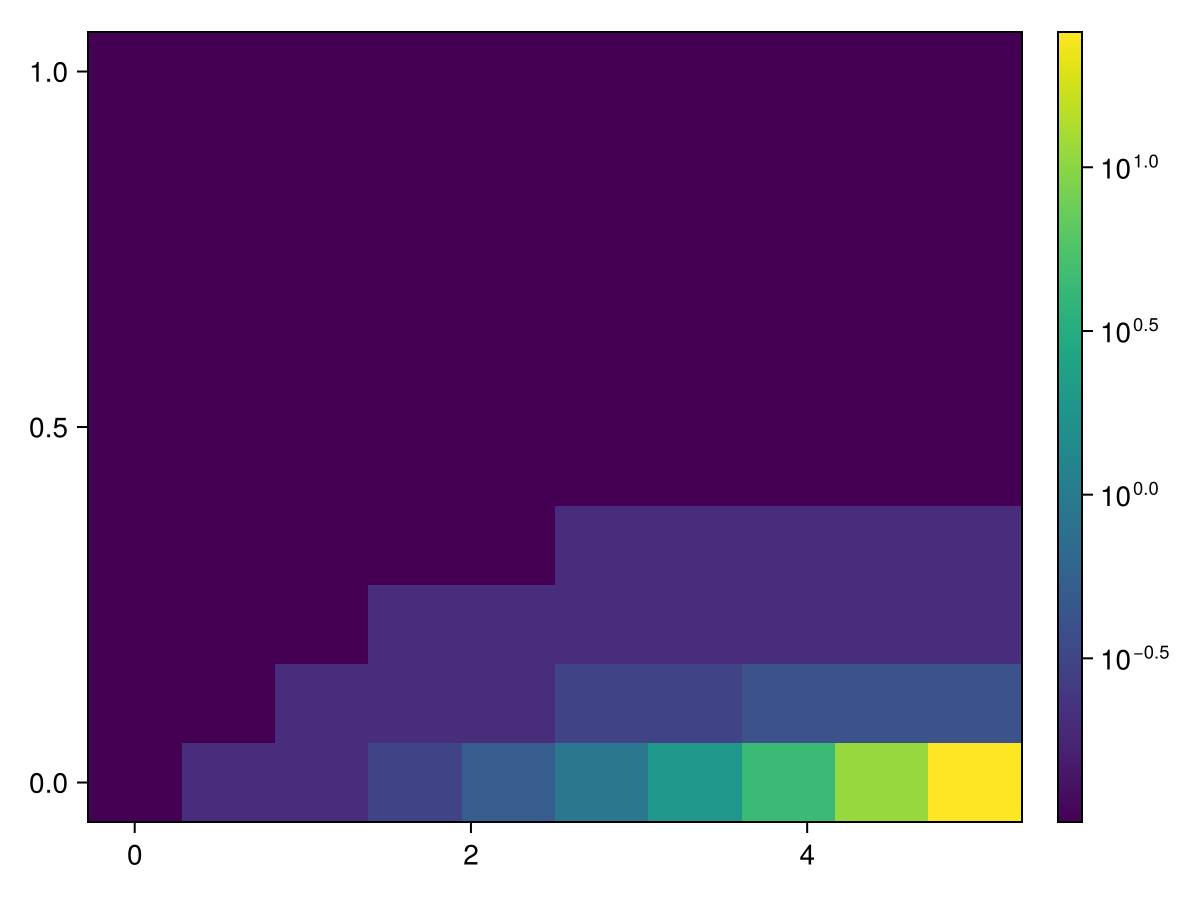

In [14]:
# mus = range(0., 10., 10)
# epsilons = range(0., 1., 10)

function kaka(L, r, mu, epsilon, th=0.8, dt=0.1, maxiter=10000)
    ma = MolAut(L, r; mu, epsilon)
    
    etm = etransmat(ma; mat=true)

    u0 = fill(0., numstates(ma))
    v0 = code_for(ma.mg, fill(0, ma.L))
    u0[v0] = 1.
    
    t = 0.
    for _ in 1:maxiter
        u = exp(etm * t) * u0
        # @show mu epsilon t u[v0]
        if u[v0] <= th
            break
        end
        
        t += dt
    end

    t
end

fap = heatmap(mus, epsilons, (a...)->kaka(6, 170, a...);
    colorscale=log10
)
Colorbar(fap.figure[1,2], fap.plot)
fap

### verifying exp with diffeqs

┌ Warning: Note: adding edges with a zero weight to this graph type has no effect.
└ @ SimpleWeightedGraphs ~/.julia/packages/SimpleWeightedGraphs/Ab8wv/src/simpleweighteddigraph.jl:170


  0.839065 seconds (811.97 k allocations: 56.204 MiB, 2.01% gc time, 99.89% compilation time)
  1.614196 seconds (3.17 M allocations: 217.391 MiB, 3.37% gc time, 77.87% compilation time)
  9.754877 seconds (22.73 M allocations: 1.535 GiB, 5.10% gc time, 99.43% compilation time: 32% of which was recompilation)


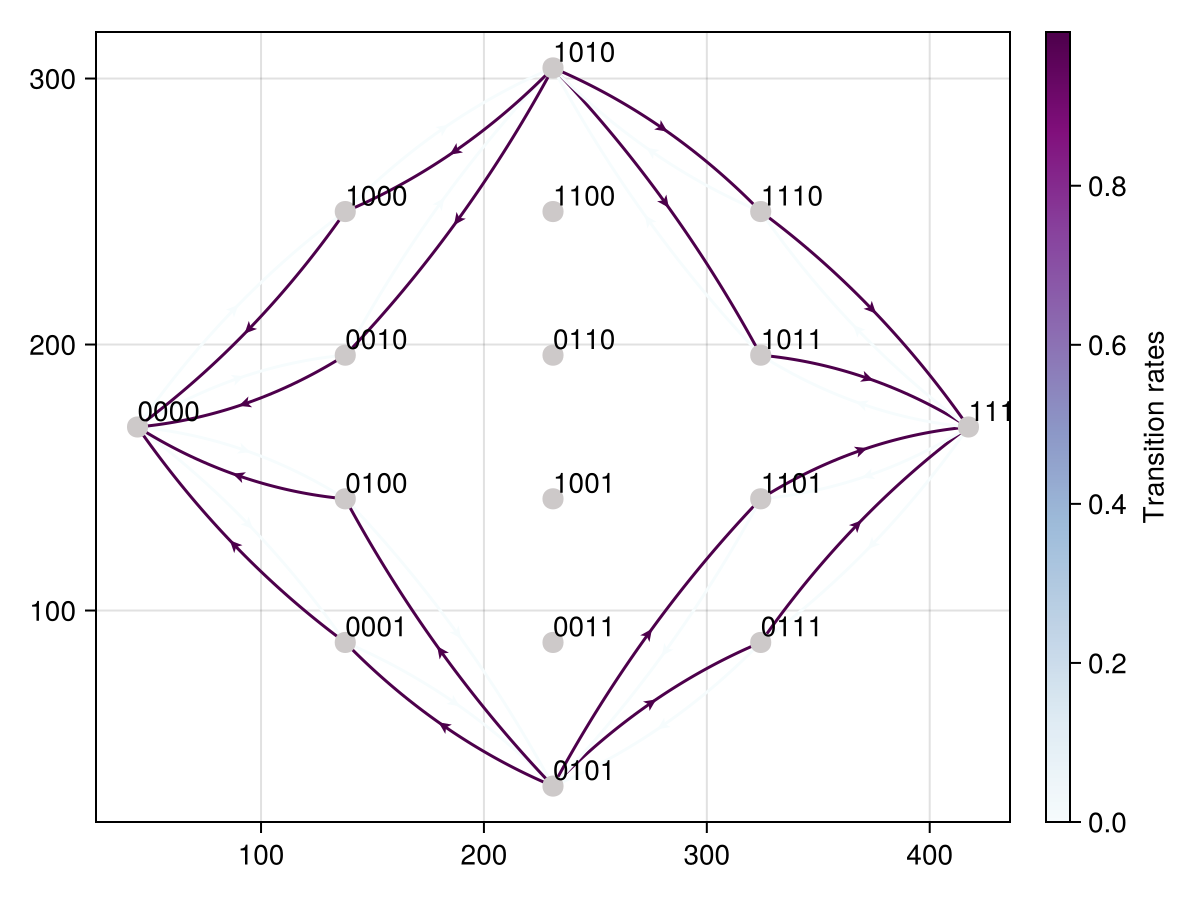

In [5]:
@time ma = MolAut(4, 232;
    mu=5,
    # epsilon=1e-3,
)

@time l = get_gv_layout_positions(ma;
    cluster=true
)
@time faa = plotgm(ma;
    layout=l,
    # layout=SFDP(dim=2),
    # flabels=false,
    # e_colormap=:viridis,
    e_colorscale=identity,
    edge_plottype=:beziersegments,
    curve_distance=5.,
)
# display(GLMakie.Screen(), faa.figure)
# faa

In [6]:
etm = etransmat(ma; mat=true);
v0 = code_for(ma.mg, fill(0, ma.L))
v1 = code_for(ma.mg, fill(1, ma.L))
(v0, v1)

(1, 16)

In [7]:
u0 = fill(0., numstates(ma))
u0[1] = 1.;
u0;

In [8]:
using DifferentialEquations

tmax = 1e5

# ode solver
p = ODEProblem((u, p, t)->etm*u, u0, (0., tmax))
@time s = solve(p);
@show s.retcode

# mat exp
ts = range(0., tmax, 100)
@time us = [exp(etm * t) * u0 for t in ts]

nothing

  4.390203 seconds (21.99 M allocations: 2.341 GiB, 14.54% gc time, 72.07% compilation time)
s.retcode = SciMLBase.ReturnCode.Success
  1.434172 seconds (2.48 M allocations: 164.702 MiB, 2.39% gc time, 99.53% compilation time)


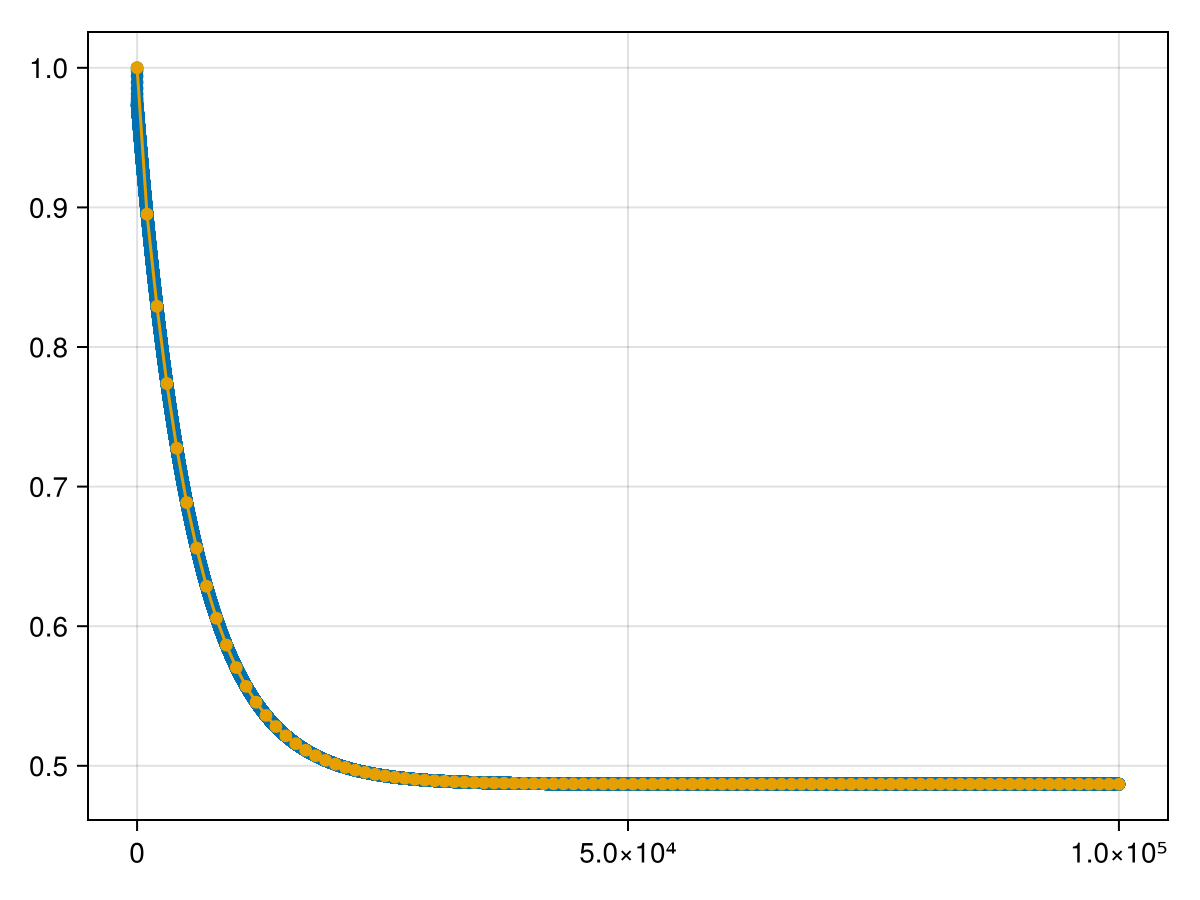

In [9]:
fap = scatterlines(s.t, getindex.(s.u, 1))

scatterlines!(fap.axis, ts, getindex.(us, 1))

# display(GLMakie.Screen(), fap)
fap

# Bits and bobs

In [3]:
GC.gc()
empty!(Out)
GC.gc()